# . steps during data analysis
1. dowload files
2. make dataframes
3. analyzed extreme values
4. Find realtionships, stat, graphs
5. describe story

In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
import numpy as np
from scipy.stats import linregress, stats
from textwrap import wrap

In [2]:
xls = pd.ExcelFile('Resources/CA-daily_temp_2010-2016_Ruby.xlsx', )
temp_2010 = pd.read_excel(xls, '2010', encoding='utf8')
temp_2011 = pd.read_excel(xls, '2011', encoding='utf8')
temp_2012 = pd.read_excel(xls, '2012', encoding='utf8')
temp_2013 = pd.read_excel(xls, '2013', encoding='utf8')
temp_2014 = pd.read_excel(xls, '2014', encoding='utf8')
temp_2015 = pd.read_excel(xls, '2015', encoding='utf8')
temp_2016 = pd.read_excel(xls, '2016', encoding='utf8')
temp_2010.head(10)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
1,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
2,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
3,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
4,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
5,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
6,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
7,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
8,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435
9,6,5,2,62101,1,38.339905,-120.763515,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Jackson-Clinton Road,"201 CLINTON ROAD, JACKSON, CA 95642",California,Amador,Jackson,NaN,41435


In [3]:
temp_2010.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       'Temp Celsius', '1st Max Value', '1st Max Hour', 'AQI', 'Method Code',
       'Method Name', 'Local Site Name', 'Address', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [4]:
# remove extraneous columns from every df
sheets = [temp_2010, temp_2011,temp_2012, temp_2013, temp_2014, temp_2015, temp_2016]
for df in sheets:
    df.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'City Name',
       'CBSA Name', 'Date of Last Change'], axis=1, inplace=True)
temp_2010.head()

,Date Local,Arithmetic Mean,Temp Celsius,1st Max Value,1st Max Hour,AQI,County Name
0,2010-01-01,49.250000,9.583333,55.0,11,NaN,Amador
1,2010-01-02,48.083333,8.935185,57.0,12,NaN,Amador
2,2010-01-03,43.916667,6.620371,55.0,12,NaN,Amador
3,2010-01-04,45.166667,7.314815,57.0,15,NaN,Amador
4,2010-01-05,40.166667,4.537037,50.0,11,NaN,Amador


In [5]:
for df in sheets:
    df['Date Local'] = pd.to_datetime(df['Date Local'], format='%Y-%m-%d')
    df['Year'] = pd.DatetimeIndex(df['Date Local']).year

In [6]:
temp_2015.head()

,Date Local,Arithmetic Mean,Temp Celsius,1st Max Value,1st Max Hour,AQI,County Name,Year
0,2015-08-01,75.433333,24.129629,88.9,16,NaN,Amador,2015
1,2015-08-02,73.833333,23.240741,89.8,15,NaN,Amador,2015
2,2015-08-03,70.137500,21.187500,86.5,15,NaN,Amador,2015
3,2015-08-04,65.766667,18.759259,79.0,15,NaN,Amador,2015
4,2015-08-05,69.937500,21.076389,87.4,16,NaN,Amador,2015


In [9]:
all_temp = pd.concat(sheets, sort=False)
all_temp.head()

,Date Local,Arithmetic Mean,Temp Celsius,1st Max Value,1st Max Hour,AQI,County Name,Year
0,2010-01-01,49.250000,9.583333,55.0,11,NaN,Amador,2010
1,2010-01-02,48.083333,8.935185,57.0,12,NaN,Amador,2010
2,2010-01-03,43.916667,6.620371,55.0,12,NaN,Amador,2010
3,2010-01-04,45.166667,7.314815,57.0,15,NaN,Amador,2010
4,2010-01-05,40.166667,4.537037,50.0,11,NaN,Amador,2010


In [8]:
#del all_ozone['Unnamed: 16']
all_temp.isnull().sum()

Date Local              0
Arithmetic Mean         0
Temp Celsius            0
1st Max Value           0
1st Max Hour            0
AQI                364657
County Name             0
Year                    0
dtype: int64

In [105]:
#all_ozone_conc.dropna()

In [11]:
all_temp = all_temp[['County Name', 'Arithmetic Mean', 'Temp Celsius', 'Year']]
all_temp = all_temp.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'Temp (F)', 'Temp Celsius': 'Temp (C)'})
all_temp.head()

,County,Temp (F),Temp (C),Year
0,Amador,49.250000,9.583333,2010
1,Amador,48.083333,8.935185,2010
2,Amador,43.916667,6.620371,2010
3,Amador,45.166667,7.314815,2010
4,Amador,40.166667,4.537037,2010


In [12]:
# Taking mean of all temperatures for plot with error bar
temp_group1a = pd.DataFrame(all_temp.groupby(['Year', 'County']).mean()).reset_index()
temp_group1a.head()

,Year,County,Temp (F),Temp (C)
0,2010,Amador,56.504883,13.613824
1,2010,Butte,60.416295,15.786831
2,2010,Calaveras,58.170961,14.539423
3,2010,Colusa,60.854933,16.030518
4,2010,Del Norte,52.261181,11.256211


In [13]:
# Taking SEM for plot
temp_group1b = pd.DataFrame(all_temp.groupby(['Year', 'County']).sem()).reset_index()
temp_group1b.head()

,Year,County,Temp (F),Temp (C)
0,2010,Amador,0.595229,0.330683
1,2010,Butte,0.344324,0.191291
2,2010,Calaveras,0.588095,0.326720
3,2010,Colusa,0.594221,0.330123
4,2010,Del Norte,0.312371,0.173539


In [14]:
df.dtypes

Date Local         datetime64[ns]
Arithmetic Mean           float64
Temp Celsius              float64
1st Max Value             float64
1st Max Hour                int64
AQI                       float64
County Name                object
Year                        int64
dtype: object

In [20]:
# To measure Max values
temp_group1c = pd.DataFrame(all_temp.groupby(['Year', 'County']).max()).reset_index()
temp_group1c

,Year,County,Temp (F),Temp (C)
0,2010,Amador,83.583333,28.657407
1,2010,Butte,95.041667,35.023148
2,2010,Calaveras,86.083333,30.046296
3,2010,Colusa,86.750000,30.416667
4,2010,Del Norte,66.875000,19.375000
5,2010,El Dorado,91.375000,32.986111
6,2010,Fresno,91.458333,33.032407
7,2010,Glenn,86.500000,30.277778
8,2010,Humboldt,76.625000,24.791667
9,2010,Imperial,106.000000,41.111111


In [19]:
#grouping based on temperature in celsius, please check --
temp_group5 = pd.DataFrame(all_temp.groupby(["Year", "County"]).mean()["Temp (C)"])
temp_group5=temp_group5.unstack(level=0)
temp_group5.head()

Temp (C)                                                         \
Year            2010       2011       2012       2013       2014       2015   
County                                                                        
Amador     13.613824  13.067103  15.375113        NaN        NaN  14.514979   
Butte      15.786831  15.256110  15.856868  17.813444        NaN  15.459671   
Calaveras  14.539423  14.037498  14.983673  16.379305        NaN  16.620924   
Colusa     16.030518  15.569444  17.423162        NaN        NaN  17.089239   
Del Norte  11.256211  10.609437  11.127669  11.003958  12.917872        NaN   

                      
Year            2016  
County                
Amador     14.863373  
Butte      18.550300  
Calaveras  15.249504  
Colusa     17.379103  
Del Norte        NaN

In [100]:
temp_group5b = pd.DataFrame(all_temp.groupby(["Year", "County"]).sem()["Temp (C)"])
temp_group5b=temp_group5b.unstack(level=0)
temp_group5b

Ozone (ppb)                                               \
Year                   2010      2011      2012      2013      2014 2015   
County                                                                     
Alameda            0.219969  0.281840  0.267340  0.265275  0.266082  NaN   
Amador             0.551038  0.618051  0.744068  0.636678  0.676410  NaN   
Butte              0.478062  0.506828  0.506019  0.493809  0.488160  NaN   
Calaveras          0.605039  0.598212  0.698589  0.576739  0.610075  NaN   
Colusa             0.436361  0.480478  0.494669  0.410618  0.421373  NaN   
Contra Costa       0.291420  0.286559  0.257836  0.239712  0.248415  NaN   
El Dorado          0.397755  0.376617  0.465831  0.387808  0.426900  NaN   
Fresno             0.297129  0.283867  0.328229  0.312378  0.312702  NaN   
Glenn              0.411637  0.538645  0.473889  0.492700  0.447996  NaN   
Humboldt           0.438205  0.355383  0.296679  0.296347  0.259614  NaN   
Imperial           0.277604  0.308460  0.322248  0.363234  0.360535  NaN   
Inyo               0.463737  0.519984  0.534540  0.327933  0.326419  NaN   
Kern               0.273236  0.309714  0.294239  0.253980  0.265795  NaN   
Kings              0.510661  0.462095  0.518840  0.514435  0.472665  NaN   
Lake               0.426954  0.427999  0.508181  0.394479  0.413287  NaN   
Los Angeles        0.158645  0.164641  0.172409  0.168850  0.173968  NaN   
Madera             0.467234  0.453681  0.445066  0.404842  0.418035  NaN   
Marin              0.390975  0.469055  0.451369  0.434913  0.441862  NaN   
Mariposa           0.386195  0.372202  0.362174  0.382062  0.479211  NaN   
Mendocino          0.336805  0.377090  0.511296  0.842617  0.463420  NaN   
Merced             0.625242  0.737199  0.674985  0.738347  0.721211  NaN   
Monterey           0.221883  0.238150  0.218082  0.216334  0.222694  NaN   
Napa               0.434442  0.459284  0.435384  0.469698  0.422205  NaN   
Nevada             0.526141  0.494046  0.535436  0.463273  0.496291  NaN   
Orange             0.277959  0.281879  0.281208  0.287015  0.282434  NaN   
Placer             0.355387  0.380899  0.361981  0.289973  0.285944  NaN   
Riverside          0.224500  0.199177  0.206089  0.200706  0.203018  NaN   
Sacramento         0.213793  0.233986  0.248821  0.216686  0.227503  NaN   
San Benito         0.301837  0.303173  0.320978  0.304166  0.301790  NaN   
San Bernardino     0.241057  0.247692  0.262087  0.241147  0.237396  NaN   
San Diego          0.161690  0.159079  0.174717  0.189377  0.180491  NaN   
San Francisco      0.474578  0.529525  0.474231  0.454426  0.444264  NaN   
San Joaquin        0.401887  0.453936  0.483916  0.458490  0.445557  NaN   
San Luis Obispo    0.208147  0.203050  0.202976  0.199336  0.186710  NaN   
San Mateo          0.473778  0.533570  0.480194  0.494147  0.482747  NaN   
Santa Barbara      0.126527  0.130185  0.123338  0.131016  0.131594  NaN   
Santa Clara        0.234661  0.223943  0.220370  0.232809  0.263647  NaN   
Santa Cruz         0.368322  0.329606  0.319673  0.285710  0.372623  NaN   
Shasta             0.325159  0.321516  0.331099  0.322428  0.314554  NaN   
Siskiyou           0.473514  0.563514  0.603289  0.582341  0.582450  NaN   
Solano             0.269416  0.306602  0.303026  0.292668  0.290138  NaN   
Sonoma             0.395273  0.333241  0.308738  0.329188  0.308598  NaN   
Stanislaus         0.413454  0.471141  0.556288  0.455648  0.507868  NaN   
Sutter             0.560058  0.617293  0.634438  0.592582  0.628087  NaN   
Tehama             0.594946  0.593579  0.664524  0.581426  0.642634  NaN   
Tulare             0.394651  0.406419  0.447099  0.404528  0.444123  NaN   
Tuolumne           0.627870  0.649169  0.707976  0.597803  0.719264  NaN   
Ventura            0.171808  0.184055  0.211678  0.192910  0.205756  NaN   
Yolo               0.299030  0.354115  0.340628  0.305996  0.302838  NaN   

                           
Year                 2016  
County 

In [120]:
#group_tot = ozone_group(ozone_group['Ozone (ppb)', year])[County].mean().unstack()#.fillna(0)
#group_tot
#ozone_group_tot = ozone_group.loc[ozone_group["Year"] == int(year), :]
#ozone_group_tot=ozone_group_tot.unstack(level=0)
#ozone_group_tot.head()
#pha_locfiltered = pha3.loc[pha3["NDC"] == 50111043302, :]
#pha_locfiltered.head()


KeyError: ('Ozone (ppb)', '2011')

In [23]:
max_temp = temp_group1c['Temp (C)'].max()
max_county = temp_group1c.loc[temp_group1c['Temp (C)'] == max_temp,:] 
#max_county = temp_group.loc[temp_group['county', 'Year'].mean () ['Temp (C)',:] 
max_county


,Year,County,Temp (F),Temp (C)
133,2013,Inyo,113.166667,45.092593


In [28]:
min_temp = temp_group1c['Temp (C)'].min()
min_county = temp_group1c.loc[temp_group1c['Temp (C)'] == min_temp,:] 
min_county

,Year,County,Temp (F),Temp (C)
87,2012,Del Norte,64.208333,17.893518


In [30]:
#sorting for each year based on mean values
temp_group_2011 = temp_group5.loc[temp_group5["Year"] == 2011, :]
#temp2011_mean_df = tempe_group5_2011.unstack(level = 0)
temp_group_2011

KeyError: 'Year'

In [68]:
max_ppb = ozone_group_2011['Ozone (ppb)'].max()
max_county_2011 = ozone_group_2011.loc[ozone_group_2011['Ozone (ppb)'] == max_ppb,:] 
max_county_2011

,Year,County,Ozone (ppb),AQI
60,2011,Inyo,47.201216,46.980609


In [69]:

min_county_2011 = ozone_group_2011.loc[ozone_group_2011['Ozone (ppb)'] == min_ppb,:] 
min_county_2011

,Year,County,Ozone (ppb),AQI
68,2011,Mendocino,14.289593,20.184066


In [73]:
ozone_group_tot = pd.DataFrame(all_ozone_conc.merge(['Year', 'County']).sem ()['Ozone (ppb)']). reset_index()
ozone_group_tot

ValueError: can not merge DataFrame with instance of type <class 'list'>

In [35]:
# find the county with the highest ppb
max_ppb = ozone_group['Ozone (ppb)', 'Year'].max()
#max_county2011 = ozone_group.loc[ozone_group['Ozone (ppb)'] == max_ppb,:] & (ozone_group.loc['Year']==2011),:]
#max_county2011

KeyError: ('Ozone (ppb)', 'Year')

In [43]:
# find the county with the highest ppb
max_ppb = ozone_group['Ozone (ppb)'].max()
max_county = ozone_group.loc[ozone_group['Ozone (ppb)'] == max_ppb,:]
max_county

,Year,County,Ozone (ppb),AQI
116,2012,Mariposa,49.596353,62.867216


In [44]:
min_ppb = ozone_group['Ozone (ppb)'].min()
min_county = ozone_group.loc[ozone_group['Ozone (ppb)'] == min_ppb,:]
min_county

,Year,County,Ozone (ppb),AQI
68,2011,Mendocino,14.289593,20.184066


In [116]:
counties = ozone_group['County'].unique()
counties

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Los Angeles',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Monterey',
       'Napa', 'Nevada', 'Orange', 'Placer', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano',
       'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo'], dtype=object)

In [118]:
# ANOVA - Counties (Mean Ozone)
# ANOVA - Counties (Mean Ozone)
ozone_dict = {}
for county in counties:
    if county not in ozone_dict:
        ozone_dict[county] = list([ozone_group['County']==county,:]['Ozone (ppb)'])
        
print("ANOVA analysis comparing ozone concentration between two ounties in California ")
try:
    ozone_compare1 = input("Choose a county: ")
    ozone_compare2 = input("Choose another county: ")
    print(stats.f_oneway(ozone_dict[ozone_compare1], ozone_dict[ozone_compare2]))
    comparison_df = pd.DataFrame(oa_children_df.loc[(oa_children_df['County']==ozone_compare1) | (oa_children_df['County']==ozone_compare2),:])
    comparison_df.boxplot('Ozone (ppb)', by='County')
    plt.ylabel("Average Ozone (ppb) from 2011-2016")
except KeyError: 
    print("Could not find county")
#comparison_df.head()


SyntaxError: invalid syntax (<ipython-input-118-93c61d7120e3>, line 6)

In [42]:
# ANOVA - Counties (Raw AQI + Raw Ozone) for chosen year

year = input("Choose a year: ")
ozone_yr = all_ozone.loc[all_ozone['Year']==int(year), :]
o3aqi_dict = {}
for county in counties:
    if county not in o3aqi_dict:
        o3aqi_dict[county] = {}
        o3aqi_dict[county]['Ozone'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['O3_ppb'])
        o3aqi_dict[county]['AQI'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['AQI'])
#print(o3aqi_dict)
        
try:
    parameter = input("Choose a parameter (AQI or Ozone): ")
    compare1 = input("Choose a county: ")
    compare2 = input("Choose another county: ")
    
    print(f"ANOVA analysis comparing {parameter} between {compare1} and {compare2} in California in {year}")

    print(stats.f_oneway(o3aqi_dict[compare1][parameter], o3aqi_dict[compare2][parameter]))
    comparison_df = pd.DataFrame(ozone_yr.loc[(ozone_yr['County Name']==compare1) | (ozone_yr['County Name']==compare2),:])
    if parameter == 'AQI':
        comparison_df.boxplot(parameter, by='County Name')
    if parameter == 'Ozone':
        comparison_df.boxplot('O3_ppb', by='County Name')
    plt.ylabel(f"{parameter} in {year}")
except KeyError: 
    print("Could not find county")

Choose a year: 2011


NameError: name 'counties' is not defined

In [10]:
asthma_df = pd.read_csv('Resources/asthma-ed-visits.csv')
asthma_df.head()

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,"117,854",40.0,7,28


In [11]:
asthma_df['Geography'].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Humbolt'], dtype=object)

In [12]:
# remove 'California' so only specific counties remain
asthma_df = asthma_df.loc[asthma_df['Geography'] != 'California', :]

In [13]:
asthma_df['Geography'].unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Humbolt'], dtype=object)

In [14]:
# check where null values exist
asthma_df.isnull().sum()

LGHC Indicator Name      0
Geography                0
Year                     0
Age Group                0
Strata                   0
Strata Name              0
Numerator              111
Rate                   637
LGHC Indicator ID        0
LGHC Target Rate         0
dtype: int64

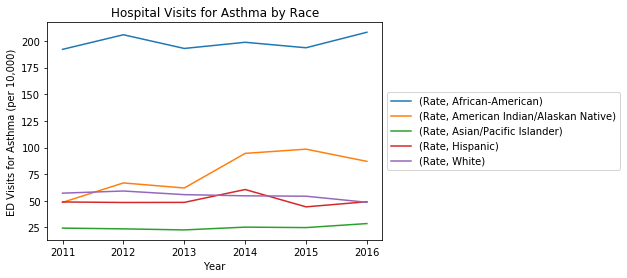

In [281]:
race_asthma = asthma_df.loc[(asthma_df['Strata Name'] == 'African-American') | (asthma_df['Strata Name'] == 'African-American') | (asthma_df['Strata Name'] == 'White') | (asthma_df['Strata Name'] == 'Hispanic') | (asthma_df['Strata Name'] == 'American Indian/Alaskan Native') | (asthma_df['Strata Name'] == 'Asian/Pacific Islander'), ['Geography', 'Strata Name','Year', 'Rate']]
race_asthma_df = pd.DataFrame(race_asthma.groupby(['Strata Name', 'Year']).mean())
race_asthma_df.unstack(0).plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("ED Visits for Asthma (per 10,000)")
plt.title("Hospital Visits for Asthma by Race")
plt.savefig('Images/asthmabyrace.png')

Text(0.5,1,'Hospital Visits for Asthma by Age')

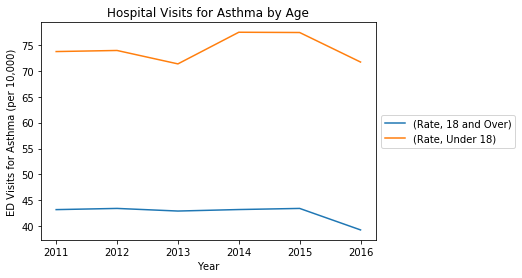

In [282]:
age_asthma = asthma_df.loc[(asthma_df['Strata Name'] == 'Under 18') | (asthma_df['Strata Name'] == '18 and Over'), ['Geography', 'Strata Name','Year', 'Rate']]
age_asthma_df = pd.DataFrame(age_asthma.groupby(['Strata Name', 'Year']).mean())
age_asthma_df.unstack(0).plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("ED Visits for Asthma (per 10,000)")
plt.title("Hospital Visits for Asthma by Age")
#plt.savefig('Images/asthmabyage.png')

In [58]:
asthma_children_df = asthma_df.loc[(asthma_df['Strata'] == 'Total Population') & (asthma_df['Strata Name']=='Under 18'),:]
asthma_children_df = asthma_children_df.rename(columns={'Geography': 'County'})
asthma_children_df.head()

,LGHC Indicator Name,County,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
796,Asthma ED Visit Rates,Alameda,2015,Under 18,Total Population,Under 18,"3,426",96.7,7,28
797,Asthma ED Visit Rates,Amador,2015,Under 18,Total Population,Under 18,45,85.1,7,28
798,Asthma ED Visit Rates,Butte,2015,Under 18,Total Population,Under 18,308,68.7,7,28
799,Asthma ED Visit Rates,Calaveras,2015,Under 18,Total Population,Under 18,46,63.0,7,28
801,Asthma ED Visit Rates,Colusa,2015,Under 18,Total Population,Under 18,48,77.0,7,28


In [59]:
asthma_adults_df = asthma_df.loc[(asthma_df['Strata'] == 'Total Population') & (asthma_df['Strata Name']=='18 and Over'),:]
asthma_adults_df = asthma_adults_df.rename(columns={'Geography': 'County'})
asthma_adults_df.head()

,LGHC Indicator Name,County,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
5,Asthma ED Visit Rates,Colusa,2015,18 and Over,Total Population,18 and Over,49,29.0,7,28


In [265]:
asthma_df.loc[asthma_df['Strata Name']=='African-American',:]

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
58,Asthma ED Visit Rates,Alameda,2015,18 and Over,Race-Ethnicity,African-American,"2,930",195.2,7,28
59,Asthma ED Visit Rates,Butte,2015,18 and Over,Race-Ethnicity,African-American,63,219.7,7,28
61,Asthma ED Visit Rates,Contra Costa,2015,18 and Over,Race-Ethnicity,African-American,"1,474",203.9,7,28
62,Asthma ED Visit Rates,El Dorado,2015,18 and Over,Race-Ethnicity,African-American,14,163.9,7,28
63,Asthma ED Visit Rates,Fresno,2015,18 and Over,Race-Ethnicity,African-American,312,87.8,7,28
64,Asthma ED Visit Rates,Glenn,2015,18 and Over,Race-Ethnicity,African-American,NaN,NaN,7,28
65,Asthma ED Visit Rates,Humboldt,2015,18 and Over,Race-Ethnicity,African-American,36,292.4,7,28
66,Asthma ED Visit Rates,Imperial,2015,18 and Over,Race-Ethnicity,African-American,31,60.7,7,28
67,Asthma ED Visit Rates,Kern,2015,18 and Over,Race-Ethnicity,African-American,610,161.7,7,28
68,Asthma ED Visit Rates,Kings,2015,18 and Over,Race-Ethnicity,African-American,89,83.0,7,28


In [63]:
asthma_children_df = asthma_children_df[['Year', 'County', 'Rate']]
asthma_children_df.head()

,Year,County,Rate
796,2015,Alameda,96.7
797,2015,Amador,85.1
798,2015,Butte,68.7
799,2015,Calaveras,63.0
801,2015,Colusa,77.0


In [60]:
asthma_adults_df = asthma_adults_df[['Year', 'County', 'Rate']]
asthma_adults_df.head()

,Year,County,Rate
0,2015,Alameda,53.1
1,2015,Amador,49.1
2,2015,Butte,43.8
3,2015,Calaveras,42.7
5,2015,Colusa,29.0


In [64]:
asthma_children_group = pd.DataFrame(asthma_children_df.groupby(['Year', 'County']).mean()).reset_index()
asthma_children_group

,Year,County,Rate
0,2011,Alameda,75.9
1,2011,Amador,91.7
2,2011,Butte,63.8
3,2011,Calaveras,84.1
4,2011,Colusa,49.4
5,2011,Contra Costa,93.2
6,2011,Del Norte,90.0
7,2011,El Dorado,40.4
8,2011,Fresno,126.1
9,2011,Glenn,53.1


In [62]:
asthma_adults_group = pd.DataFrame(asthma_adults_df.groupby(['Year', 'County']).mean()).reset_index()
asthma_adults_group

,Year,County,Rate
0,2011,Alameda,56.6
1,2011,Amador,58.1
2,2011,Butte,49.9
3,2011,Calaveras,49.5
4,2011,Colusa,23.4
5,2011,Contra Costa,67.3
6,2011,Del Norte,46.7
7,2011,El Dorado,30.3
8,2011,Fresno,53.0
9,2011,Glenn,39.9


In [65]:
oa_children_df = pd.merge(ozone_group, asthma_children_group, on=['Year','County'])
oa_children_df

,Year,County,Ozone (ppb),AQI,Rate
0,2011,Alameda,21.322507,26.141045,75.9
1,2011,Amador,25.426951,36.361644,91.7
2,2011,Butte,32.591449,37.293151,63.8
3,2011,Calaveras,29.013634,40.358127,84.1
4,2011,Colusa,25.211324,32.066482,49.4
5,2011,Contra Costa,22.785799,28.416667,93.2
6,2011,El Dorado,39.995495,47.191280,40.4
7,2011,Fresno,31.305375,49.700969,126.1
8,2011,Glenn,27.425226,34.767908,53.1
9,2011,Humboldt,22.321125,24.102996,65.0


In [66]:
oa_children_df.isnull().sum()

Year           0
County         0
Ozone (ppb)    0
AQI            0
Rate           2
dtype: int64

In [67]:
oa_children_df = oa_df.dropna()

In [68]:
oa_adults_df = pd.merge(ozone_group, asthma_adults_group, on=['Year','County'])
oa_adults_df

,Year,County,Ozone (ppb),AQI,Rate
0,2011,Alameda,21.322507,26.141045,56.6
1,2011,Amador,25.426951,36.361644,58.1
2,2011,Butte,32.591449,37.293151,49.9
3,2011,Calaveras,29.013634,40.358127,49.5
4,2011,Colusa,25.211324,32.066482,23.4
5,2011,Contra Costa,22.785799,28.416667,67.3
6,2011,El Dorado,39.995495,47.191280,30.3
7,2011,Fresno,31.305375,49.700969,53.0
8,2011,Glenn,27.425226,34.767908,39.9
9,2011,Humboldt,22.321125,24.102996,67.2


In [69]:
oa_adults_df.isnull().sum()

Year           0
County         0
Ozone (ppb)    0
AQI            0
Rate           0
dtype: int64

In [78]:
# ANOVA - Ozone (2011 to 2016)
ozone_2011 = list(oa_children_df.loc[oa_df['Year']==2011,:]['Ozone (ppb)'])
ozone_2012 = list(oa_children_df.loc[oa_df['Year']==2012,:]['Ozone (ppb)'])
ozone_2013 = list(oa_children_df.loc[oa_df['Year']==2013,:]['Ozone (ppb)'])
ozone_2014 = list(oa_children_df.loc[oa_df['Year']==2014,:]['Ozone (ppb)'])
ozone_2015 = list(oa_children_df.loc[oa_df['Year']==2015,:]['Ozone (ppb)'])
ozone_2016 = list(oa_children_df.loc[oa_df['Year']==2016,:]['Ozone (ppb)'])

In [80]:
stats.f_oneway(ozone_2011, ozone_2012, ozone_2013, ozone_2014, ozone_2015, ozone_2016)

F_onewayResult(statistic=1.7766764634207601, pvalue=0.1175732871722117)

In [81]:
# ANOVA - AQI (2011 to 2016)
aqi_2011 = list(oa_children_df.loc[oa_df['Year']==2011,:]['AQI'])
aqi_2012 = list(oa_children_df.loc[oa_df['Year']==2012,:]['AQI'])
aqi_2013 = list(oa_children_df.loc[oa_df['Year']==2013,:]['AQI'])
aqi_2014 = list(oa_children_df.loc[oa_df['Year']==2014,:]['AQI'])
aqi_2015 = list(oa_children_df.loc[oa_df['Year']==2015,:]['AQI'])
aqi_2016 = list(oa_children_df.loc[oa_df['Year']==2016,:]['AQI'])
stats.f_oneway(aqi_2011, aqi_2012, aqi_2013, aqi_2014, aqi_2015, aqi_2016)

F_onewayResult(statistic=2.9117392365511257, pvalue=0.013957914260459019)

In [83]:
counties = oa_children_df['County'].unique()
counties

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Los Angeles',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Monterey',
       'Napa', 'Nevada', 'Orange', 'Placer', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano',
       'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo'], dtype=object)

ANOVA analysis comparing ozone concentration between two ounties in California 
Choose a county: Los Angeles
Choose another county: San Diego
F_onewayResult(statistic=1.9365458322850078, pvalue=0.1942217250696738)


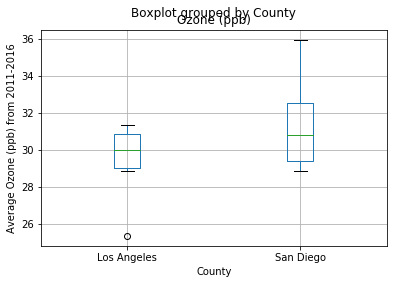

In [84]:
# ANOVA - Counties (Mean Ozone)
ozone_dict = {}
for county in counties:
    if county not in ozone_dict:
        ozone_dict[county] = list(oa_children_df.loc[oa_df['County']==county,:]['Ozone (ppb)'])
        
print("ANOVA analysis comparing ozone concentration between two ounties in California ")
try:
    ozone_compare1 = input("Choose a county: ")
    ozone_compare2 = input("Choose another county: ")
    print(stats.f_oneway(ozone_dict[ozone_compare1], ozone_dict[ozone_compare2]))
    comparison_df = pd.DataFrame(oa_children_df.loc[(oa_children_df['County']==ozone_compare1) | (oa_children_df['County']==ozone_compare2),:])
    comparison_df.boxplot('Ozone (ppb)', by='County')
    plt.ylabel("Average Ozone (ppb) from 2011-2016")
except KeyError: 
    print("Could not find county")
#comparison_df.head()

In [85]:
# ANOVA - Counties (Mean AQI)
aqi_dict = {}
for county in counties:
    if county not in aqi_dict:
        aqi_dict[county] = list(oa_df.loc[oa_children_df['County']==county,:]['AQI'])
try:
    aqi_compare1 = input("Choose a county: ")
    aqi_compare2 = input("Choose another county: ")
    print(stats.f_oneway(aqi_dict[aqi_compare1], aqi_dict[aqi_compare2]))
except KeyError: 
    print("Could not find county")

Choose a county: San Diego
Choose another county: Los Angeles
F_onewayResult(statistic=7.559873305941429, pvalue=0.020495039631804386)


Choose a year: 2011
Choose a parameter (AQI or Ozone): AQI
Choose a county: Inyo
Choose another county: Mendocino
ANOVA analysis comparing AQI between Inyo and Mendocino in California in 2011
F_onewayResult(statistic=815.9075749708891, pvalue=1.0248009677206157e-120)


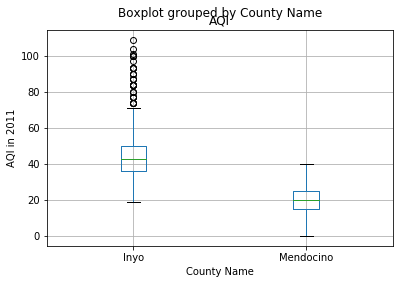

In [86]:
# ANOVA - Counties (Raw AQI + Raw Ozone) for chosen year

year = input("Choose a year: ")
ozone_yr = all_ozone.loc[all_ozone['Year']==int(year), :]
o3aqi_dict = {}
for county in counties:
    if county not in o3aqi_dict:
        o3aqi_dict[county] = {}
        o3aqi_dict[county]['Ozone'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['O3_ppb'])
        o3aqi_dict[county]['AQI'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['AQI'])
#print(o3aqi_dict)
        
try:
    parameter = input("Choose a parameter (AQI or Ozone): ")
    compare1 = input("Choose a county: ")
    compare2 = input("Choose another county: ")
    
    print(f"ANOVA analysis comparing {parameter} between {compare1} and {compare2} in California in {year}")

    print(stats.f_oneway(o3aqi_dict[compare1][parameter], o3aqi_dict[compare2][parameter]))
    comparison_df = pd.DataFrame(ozone_yr.loc[(ozone_yr['County Name']==compare1) | (ozone_yr['County Name']==compare2),:])
    if parameter == 'AQI':
        comparison_df.boxplot(parameter, by='County Name')
    if parameter == 'Ozone':
        comparison_df.boxplot('O3_ppb', by='County Name')
    plt.ylabel(f"{parameter} in {year}")
except KeyError: 
    print("Could not find county")

Text(0.5,0,'Asthma Rates')

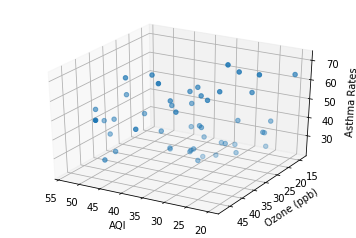

In [95]:
# 3D PLOT - AQI & Ozone vs Asthma Rates
test_df = oa_adults_df.loc[oa_adults_df['Year']==2011, :]
#test_df = oa_df.loc[oa_df['County']=='Inyo', :]
#test_df = oa_df.loc[:,:]  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_df['AQI'], test_df['Ozone (ppb)'], test_df['Rate'])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

ax.set_xlabel('AQI')
ax.set_ylabel('Ozone (ppb)')
ax.set_zlabel('Asthma Rates')

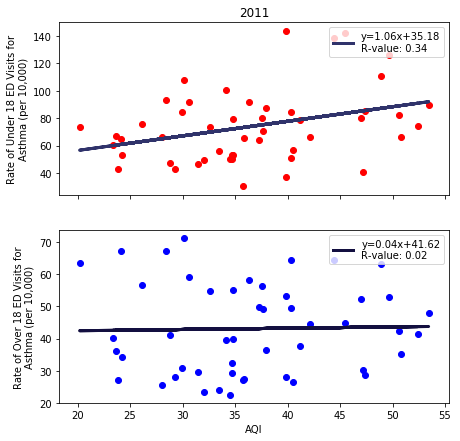

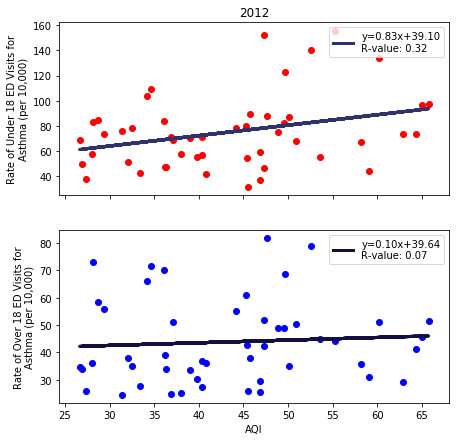

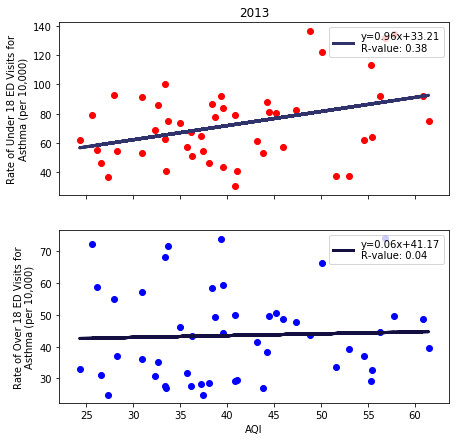

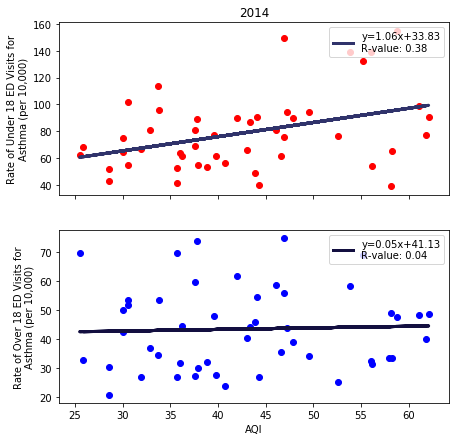

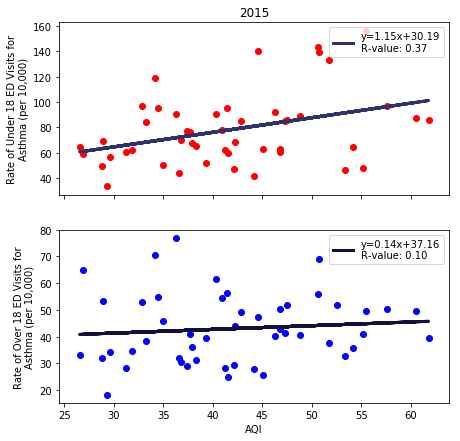

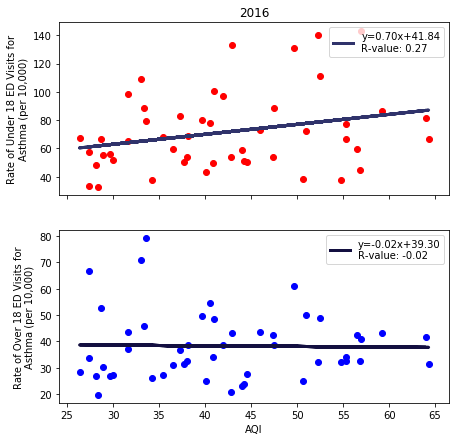

In [259]:
# COMBINED (ADULTS + CHILDREN) AQI
years = ['2011', '2012', '2013', '2014', '2015', '2016']
color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

for year in years:
    child_df = oa_children_df.loc[oa_children_df['Year']==int(year), :]
    adult_df = oa_adults_df.loc[oa_adults_df['Year']==int(year), :]
    
    (child_slope, child_intercept, child_r, _, _) = linregress(child_df['AQI'],child_df['Rate'])
    child_fit = child_slope * child_df['AQI'] + child_intercept
    
    (adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['AQI'],adult_df['Rate'])
    adult_fit = adult_slope * adult_df['AQI'] + adult_intercept
    
    f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
    axarr[0].plot(child_df['AQI'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
    axarr[0].legend(loc="upper right")
    axarr[0].scatter(child_df['AQI'], child_df['Rate'], c='red')
    axarr[0].set_title(f'{year}')
    axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
    axarr[1].plot(adult_df['AQI'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
    axarr[1].legend(loc="upper right")
    axarr[1].scatter(adult_df['AQI'], adult_df['Rate'], c='blue')
    axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
    axarr[1].set_xlabel('AQI') 
    f.savefig(f'Images/aqivsasthma_{year}.png')

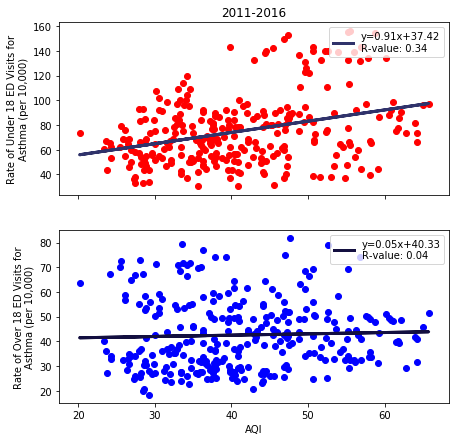

In [260]:
# AQI ALL
#years = ['2011', '2012', '2013', '2014', '2015', '2016']
#color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

child_df = oa_children_df.loc[:]
adult_df = oa_adults_df.loc[:]
    
(child_slope, child_intercept, child_r, _, _) = linregress(child_df['AQI'],child_df['Rate'])
child_fit = child_slope * child_df['AQI'] + child_intercept
    
(adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['AQI'],adult_df['Rate'])
adult_fit = adult_slope * adult_df['AQI'] + adult_intercept
    
f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
axarr[0].plot(child_df['AQI'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
axarr[0].legend(loc="upper right")
axarr[0].scatter(child_df['AQI'], child_df['Rate'], c='red')
axarr[0].set_title(f'2011-2016')
axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
axarr[1].plot(adult_df['AQI'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
axarr[1].legend(loc="upper right")
axarr[1].scatter(adult_df['AQI'], adult_df['Rate'], c='blue')
axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
axarr[1].set_xlabel('AQI')
f.savefig(f'Images/aqivsasthma2011to2016.png')

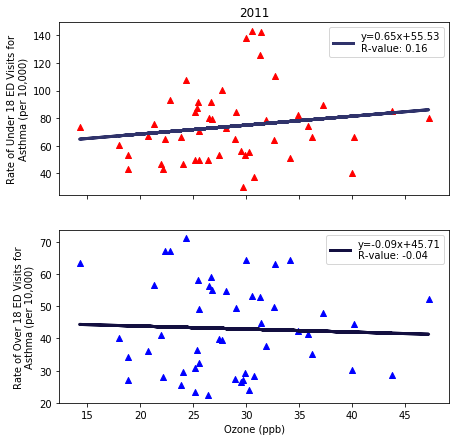

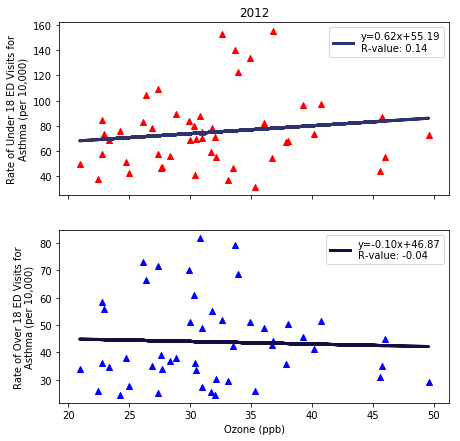

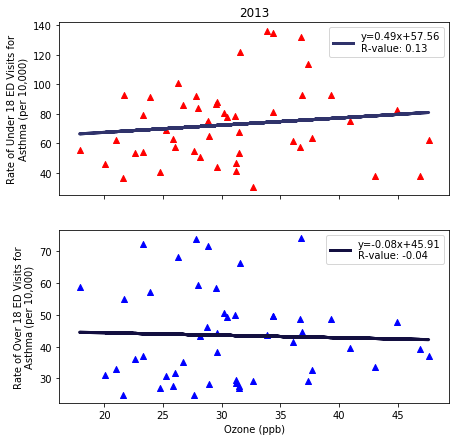

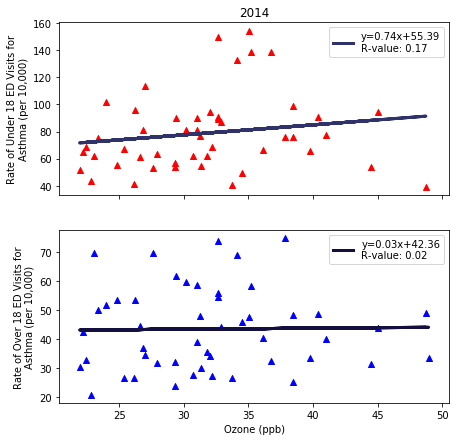

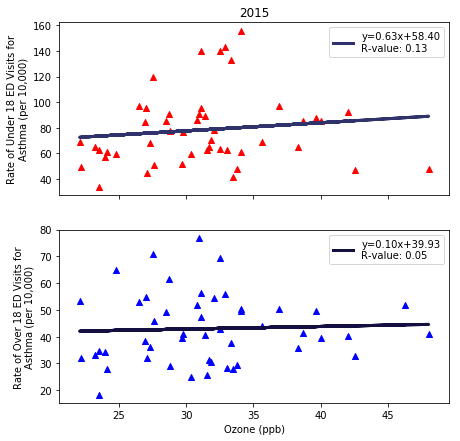

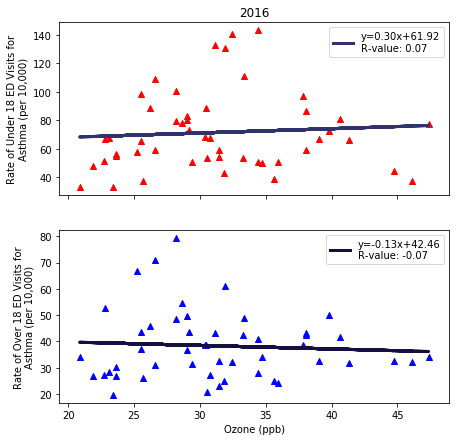

In [261]:
# COMBINED (ADULTS + CHILDREN) OZONE
years = ['2011', '2012', '2013', '2014', '2015', '2016']
color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

for year in years:
    child_df = oa_children_df.loc[oa_children_df['Year']==int(year), :]
    adult_df = oa_adults_df.loc[oa_adults_df['Year']==int(year), :]
    
    (child_slope, child_intercept, child_r, _, _) = linregress(child_df['Ozone (ppb)'],child_df['Rate'])
    child_fit = child_slope * child_df['Ozone (ppb)'] + child_intercept
    
    (adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['Ozone (ppb)'],adult_df['Rate'])
    adult_fit = adult_slope * adult_df['Ozone (ppb)'] + adult_intercept
    
    f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    axarr[0].plot(child_df['Ozone (ppb)'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
    axarr[0].legend(loc="upper right")
    axarr[0].scatter(child_df['Ozone (ppb)'], child_df['Rate'], c='red', marker="^")
    axarr[0].set_title(f'{year}')
    axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
    axarr[1].plot(adult_df['Ozone (ppb)'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
    axarr[1].legend(loc="upper right")
    axarr[1].scatter(adult_df['Ozone (ppb)'], adult_df['Rate'], c='blue', marker="^")
    axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
    axarr[1].set_xlabel('Ozone (ppb)')    
    f.savefig(f'Images/ozonevsasthma_{year}.png')

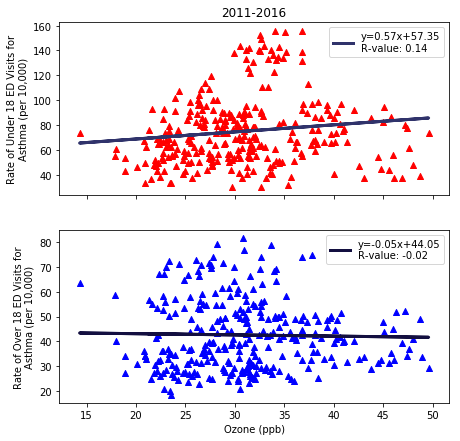

In [262]:
# OZONE ALL
#years = ['2011', '2012', '2013', '2014', '2015', '2016']
#color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

child_df = oa_children_df.loc[:]
adult_df = oa_adults_df.loc[:]
    
(child_slope, child_intercept, child_r, _, _) = linregress(child_df['Ozone (ppb)'],child_df['Rate'])
child_fit = child_slope * child_df['Ozone (ppb)'] + child_intercept
    
(adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['Ozone (ppb)'],adult_df['Rate'])
adult_fit = adult_slope * adult_df['Ozone (ppb)'] + adult_intercept
    
f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
axarr[0].plot(child_df['Ozone (ppb)'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
axarr[0].legend(loc="upper right")
axarr[0].scatter(child_df['Ozone (ppb)'], child_df['Rate'], c='red', marker="^")
axarr[0].set_title(f'2011-2016')
axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
axarr[1].plot(adult_df['Ozone (ppb)'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
axarr[1].legend(loc="upper right")
axarr[1].scatter(adult_df['Ozone (ppb)'], adult_df['Rate'], c='blue', marker="^")
axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
axarr[1].set_xlabel('Ozone (ppb)')
f.savefig(f'Images/aqivsozone2011to2016.png')

In [208]:
pm25_df = pd.read_csv('Resources/CA_Counties_PM25_2011-2016.csv')
del pm25_df['Unnamed: 0']
pm25_df = pm25_df.rename(columns={"County Names": "County"})
pm25_df.head()

,County,2011 PM2.5,2012 PM2.5,2013 PM2.5,2014 PM2.5,2015 PM2.5,2016 PM2.5
0,Alameda,9.319157,8.049433,10.611844,8.550985,9.340246,7.695975
1,Butte,12.003279,7.797619,10.166667,8.807407,9.169578,7.600915
2,Calaveras,9.242926,7.001856,9.243005,7.922196,8.771994,8.101435
3,Colusa,5.830245,9.018392,7.435804,6.543522,6.837357,4.665881
4,Contra Costa,8.458423,7.061688,9.848264,8.597702,8.886865,7.098265


In [252]:
pm25_a_2011 = oa_adults_df.loc[oa_adults_df['Year']==2011,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2011 PM2.5']], on='County', how='inner')
pm25_a_2011 = pm25_a_2011.rename(columns={"2011 PM2.5": "PM2.5"})
pm25_a_2012 = oa_adults_df.loc[oa_adults_df['Year']==2012,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2012 PM2.5']], on='County', how='inner')
pm25_a_2012 = pm25_a_2012.rename(columns={"2012 PM2.5": "PM2.5"})
pm25_a_2013 = oa_adults_df.loc[oa_adults_df['Year']==2013,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2013 PM2.5']], on='County', how='inner')
pm25_a_2013 = pm25_a_2013.rename(columns={"2013 PM2.5": "PM2.5"})
pm25_a_2014 = oa_adults_df.loc[oa_adults_df['Year']==2014,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2014 PM2.5']], on='County', how='inner')
pm25_a_2014 = pm25_a_2014.rename(columns={"2014 PM2.5": "PM2.5"})
pm25_a_2015 = oa_adults_df.loc[oa_adults_df['Year']==2015,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2015 PM2.5']], on='County', how='inner')
pm25_a_2015 = pm25_a_2015.rename(columns={"2015 PM2.5": "PM2.5"})
pm25_a_2016 = oa_adults_df.loc[oa_adults_df['Year']==2016,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2016 PM2.5']], on='County', how='inner')
pm25_a_2016 = pm25_a_2016.rename(columns={"2016 PM2.5": "PM2.5"})

pm25_c_2011 = oa_children_df.loc[oa_children_df['Year']==2011,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2011 PM2.5']], on='County', how='inner')
pm25_c_2011 = pm25_c_2011.rename(columns={"2011 PM2.5": "PM2.5"})
pm25_c_2012 = oa_children_df.loc[oa_children_df['Year']==2012,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2012 PM2.5']], on='County', how='inner')
pm25_c_2012 = pm25_c_2012.rename(columns={"2012 PM2.5": "PM2.5"})
pm25_c_2013 = oa_children_df.loc[oa_children_df['Year']==2013,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2013 PM2.5']], on='County', how='inner')
pm25_c_2013 = pm25_c_2013.rename(columns={"2013 PM2.5": "PM2.5"})
pm25_c_2014 = oa_children_df.loc[oa_children_df['Year']==2014,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2014 PM2.5']], on='County', how='inner')
pm25_c_2014 = pm25_c_2014.rename(columns={"2014 PM2.5": "PM2.5"})
pm25_c_2015 = oa_children_df.loc[oa_children_df['Year']==2015,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2015 PM2.5']], on='County', how='inner')
pm25_c_2015 = pm25_c_2015.rename(columns={"2015 PM2.5": "PM2.5"})
pm25_c_2016 = oa_children_df.loc[oa_children_df['Year']==2016,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2016 PM2.5']], on='County', how='inner')
pm25_c_2016 = pm25_c_2016.rename(columns={"2016 PM2.5": "PM2.5"})

In [253]:
pm25_a_2016

,Year,County,Rate,PM2.5
0,2016,Alameda,43.7,7.695975
1,2016,Butte,34.0,7.600915
2,2016,Calaveras,42.3,8.101435
3,2016,Colusa,25.0,4.665881
4,2016,Contra Costa,45.7,7.098265
5,2016,Fresno,41.1,11.279234
6,2016,Humboldt,66.8,5.962855
7,2016,Imperial,43.1,11.664553
8,2016,Inyo,38.8,5.352194
9,2016,Kern,43.3,8.040060


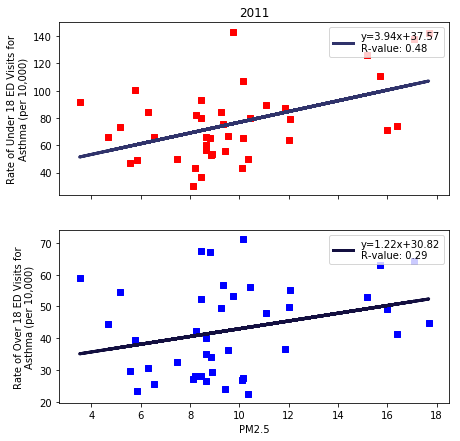

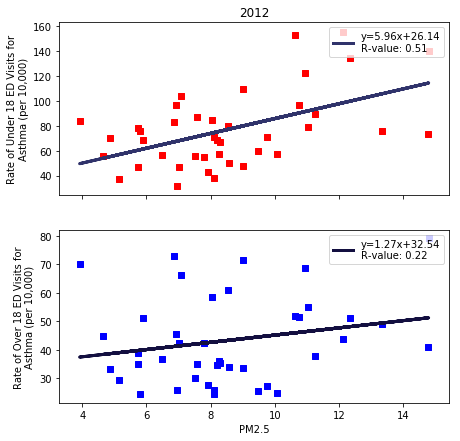

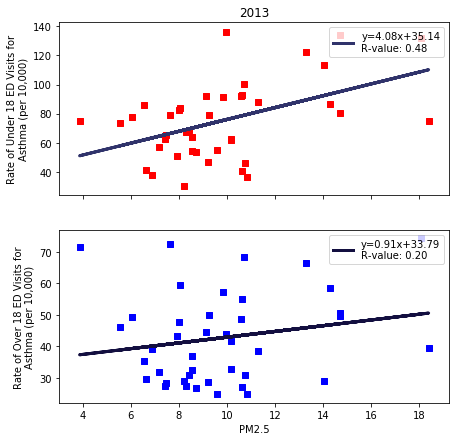

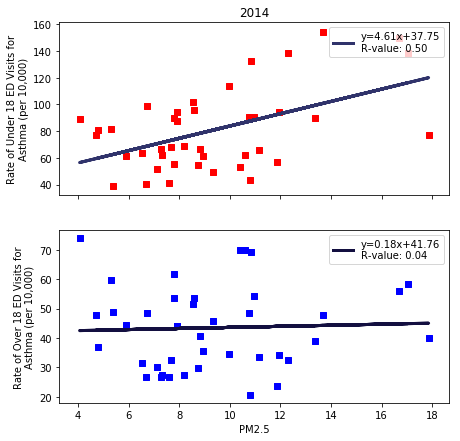

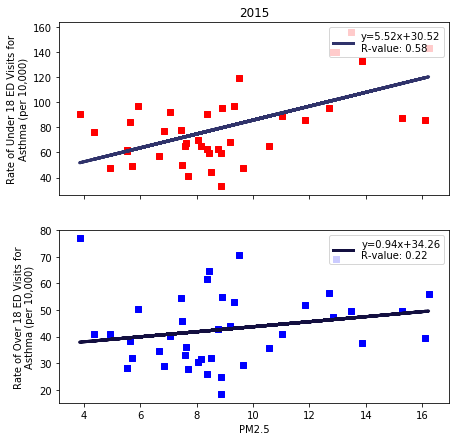

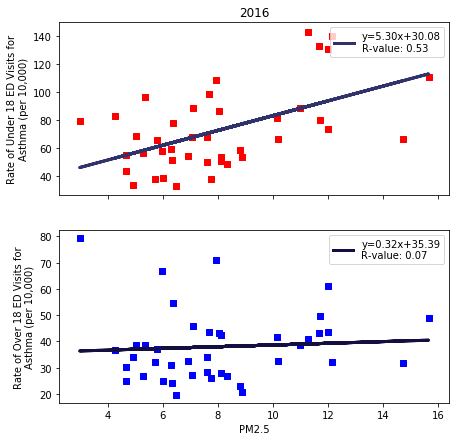

In [263]:
# COMBINED (ADULTS + CHILDREN) PM2.5
years = ['2011', '2012', '2013', '2014', '2015', '2016']
#dfs = [pm25_c_2011, pm25_c_2012, pm25_c_2013, pm25_c_2014, pm25_c_2015, pm25_c_2016]
df_dict = {'2011': [pm25_c_2011, pm25_a_2011],
          '2012': [pm25_c_2012, pm25_a_2012],
          '2013': [pm25_c_2013, pm25_a_2013],
          '2014': [pm25_c_2014, pm25_a_2014],
          '2015': [pm25_c_2015, pm25_a_2015],
          '2016': [pm25_c_2016, pm25_a_2016],}

color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

for year in years:
    child_df = df_dict[year][0].loc[:]
    adult_df = df_dict[year][1].loc[:]
    
    (child_slope, child_intercept, child_r, _, _) = linregress(child_df['PM2.5'],child_df['Rate'])
    child_fit = child_slope * child_df['PM2.5'] + child_intercept
    
    (adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['PM2.5'],adult_df['Rate'])
    adult_fit = adult_slope * adult_df['PM2.5'] + adult_intercept
    
    f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    axarr[0].plot(child_df['PM2.5'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
    axarr[0].legend(loc="upper right")
    axarr[0].scatter(child_df['PM2.5'], child_df['Rate'], c='red', marker='s')
    axarr[0].set_title(f'{year}')
    axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
    axarr[1].plot(adult_df['PM2.5'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
    axarr[1].legend(loc="upper right")
    axarr[1].scatter(adult_df['PM2.5'], adult_df['Rate'], c='blue', marker='s')
    axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
    axarr[1].set_xlabel('PM2.5')    
    f.savefig(f'Images/pm25vsasthma_{year}.png')

In [255]:
# PM2.5 ALL
#years = ['2011', '2012', '2013', '2014', '2015', '2016']
#color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}
adults_pm25 = [pm25_a_2011, pm25_a_2012, pm25_a_2013, pm25_a_2014, pm25_a_2015, pm25_a_2016]
child_pm25 = [pm25_c_2011, pm25_c_2012, pm25_c_2013, pm25_c_2014, pm25_c_2015, pm25_c_2016]
all_pm25_a = pd.concat(adults_pm25, sort=False)
all_pm25_c = pd.concat(child_pm25, sort=False)
all_pm25_a

,Year,County,Rate,PM2.5
0,2011,Alameda,56.6,9.319157
1,2011,Butte,49.9,12.003279
2,2011,Calaveras,49.5,9.242926
3,2011,Colusa,23.4,5.830245
4,2011,Contra Costa,67.3,8.458423
5,2011,Fresno,53.0,15.162573
6,2011,Humboldt,67.2,8.803835
7,2011,Imperial,53.2,9.759794
8,2011,Inyo,52.4,8.444740
9,2011,Kern,42.2,8.260165


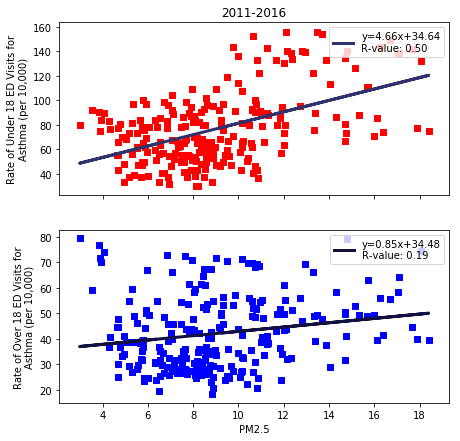

In [264]:
child_df = all_pm25_c.loc[:]
adult_df = all_pm25_a.loc[:]
    
(child_slope, child_intercept, child_r, _, _) = linregress(child_df['PM2.5'],child_df['Rate'])
child_fit = child_slope * child_df['PM2.5'] + child_intercept
    
(adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['PM2.5'],adult_df['Rate'])
adult_fit = adult_slope * adult_df['PM2.5'] + adult_intercept
    
f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
axarr[0].plot(child_df['PM2.5'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
axarr[0].legend(loc="upper right")
axarr[0].scatter(child_df['PM2.5'], child_df['Rate'], c='red', marker='s')
axarr[0].set_title(f'2011-2016')
axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
axarr[1].plot(adult_df['PM2.5'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
axarr[1].legend(loc="upper right")
axarr[1].scatter(adult_df['PM2.5'], adult_df['Rate'], c='blue', marker='s')
axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
axarr[1].set_xlabel('PM2.5')
f.savefig(f'Images/aqivspm252011to2016.png')